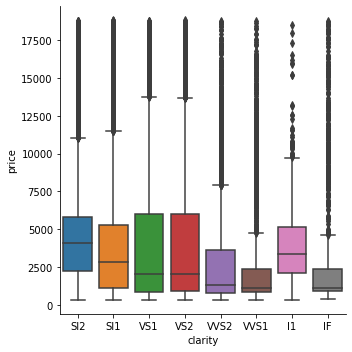

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm  # one way to do regs
from sklearn.linear_model import LinearRegression

diamonds = sns.load_dataset('diamonds')

# remember the relationship between the quality of diamonds and their price:
# low quality diamonds (poor cuts, bad colours, and inferior clarity) have higher prices
visual = sns.catplot(data=diamonds,
                y='price',x='clarity',kind='box')

visual

In [4]:
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


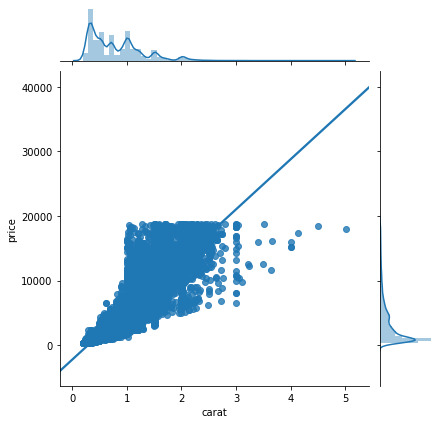

In [6]:
visual2 = sns.jointplot(data=diamonds,
                y='price',x='carat',kind='reg')

In [21]:
diamonds2 = (diamonds
             .query('carat<2.5')
             .assign( lprice = np.log(diamonds['price']) ) # shrinks the distribution and removes outliers
             .assign( lcarat = np.log(diamonds['carat']) ) #....linear analysis for exponential models
            )

diamonds2.describe()
#sns.jointplot(data=diamonds2, x= 'lprice', y='lcarat',kind='reg')

#as long as you have the y variable and the constant prediciton is correct, mostly 
# after you create log, you reverse the log and get a predicition that creates u shaped dataset 
#ran a model, predicted a price based on carat

,carat,depth,table,price,x,y,z,lprice,lcarat
count,53797.000000,53797.000000,53797.000000,53797.000000,53797.000000,53797.000000,53797.000000,53797.000000,53797.000000
mean,0.792699,61.747332,57.455053,3902.646077,5.722663,5.726203,3.533463,7.781923,-0.398700
std,0.463110,1.429266,2.233569,3948.453507,1.110874,1.131990,0.698619,1.011557,0.581060
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000,5.786897,-1.609438
25%,0.400000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000,6.854355,-0.916291
50%,0.700000,61.800000,57.000000,2396.000000,5.690000,5.710000,3.520000,7.781556,-0.356675
75%,1.040000,62.500000,59.000000,5292.000000,6.530000,6.530000,4.030000,8.573952,0.039221
max,2.490000,79.000000,95.000000,18823.000000,8.890000,58.900000,31.800000,9.842835,0.912283


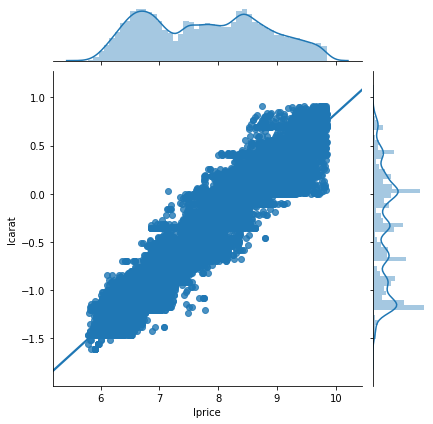

In [22]:
sns.jointplot(data=diamonds2, x= 'lprice', y='lcarat',kind='reg')

In [ ]:
# regress me please

# sm framework
y = diamonds2['lprice']
x = diamonds2['lcarat']
model1 = sm.OLS(diamonds2['lprice'])



results1 = model1.fit()
print(results1.summary())
resid1 = results1.resid     # can put resid1 in df if you want

# sklearn framework
X = ... # 
y = ... 
model = LinearRegression()
model.fit(X, y)
y_predict = model.predict(X)
resid1 = y - y_predict